# Cleaning Data

In [22]:
import pandas as pd



# Baca CSV
df = pd.read_csv("data/idn-rainfall-subnat-5ytd.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90802 entries, 0 to 90801
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       90802 non-null  object 
 1   adm_level  90802 non-null  int64  
 2   adm_id     90802 non-null  int64  
 3   PCODE      90802 non-null  object 
 4   n_pixels   90802 non-null  float64
 5   rfh        90802 non-null  float64
 6   rfh_avg    90802 non-null  float64
 7   r1h        90802 non-null  float64
 8   r1h_avg    90802 non-null  float64
 9   r3h        90802 non-null  float64
 10  r3h_avg    90802 non-null  float64
 11  rfq        90802 non-null  float64
 12  r1q        90802 non-null  float64
 13  r3q        90802 non-null  float64
 14  version    90802 non-null  object 
dtypes: float64(10), int64(2), object(3)
memory usage: 10.4+ MB


In [23]:
df['date'] = pd.to_datetime(df['date'])

df['year_month'] = df['date'].dt.to_period('M')

df_monthly = df.groupby('year_month', as_index=False).agg({
    'rfh': 'sum',   # total curah hujan per bulan
    'r1q': 'mean'   # rata-rata kelembapan tanah per bulan
})

# Tambahkan jumlah hari di tiap bulan
df_monthly['days_in_month'] = df_monthly['year_month'].dt.days_in_month

# Buat fitur baru: rata-rata curah hujan per hari
df_monthly['rfh_avg_per_hari'] = df_monthly['rfh'] / df_monthly['days_in_month']

df_monthly.head()


,year_month,rfh,r1q,days_in_month,rfh_avg_per_hari
0,2021-01,187771.771242,117.859010,31,6057.153911
1,2021-02,151508.907771,110.662893,28,5411.032420
2,2021-03,158540.740725,102.602612,31,5114.217443
3,2021-04,117116.671788,101.498824,30,3903.889060
4,2021-05,126709.488898,92.293287,31,4087.402868


In [24]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype    
---  ------            --------------  -----    
 0   year_month        56 non-null     period[M]
 1   rfh               56 non-null     float64  
 2   r1q               56 non-null     float64  
 3   days_in_month     56 non-null     int64    
 4   rfh_avg_per_hari  56 non-null     float64  
dtypes: float64(3), int64(1), period[M](1)
memory usage: 2.3 KB


In [25]:
df_tp = pd.read_csv("data/Dataset Produksi Padi - Sheet1.csv")

df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Datetime             60 non-null     object
 1   Luas Panen Padi      60 non-null     object
 2   Produksi Padi        60 non-null     object
 3   Beras                60 non-null     object
 4   Potensi Gagal Panen  60 non-null     object
dtypes: object(5)
memory usage: 2.5+ KB


In [26]:
df_tp['Datetime'] = pd.to_datetime(df_tp['Datetime'], format="%d/%m/%Y").dt.to_period('M')

# Ganti koma desimal menjadi titik dan ubah tipe ke float64
for col in df_tp.columns:
    if col != 'Datetime':  # skip kolom waktu
        df_tp[col] = df_tp[col].replace({',': ''}, regex=True).astype(float)

df_tp.head()

,Datetime,Luas Panen Padi,Produksi Padi,Beras,Potensi Gagal Panen
0,2020-01,324354.86,1620438.44,929517.79,53157.33
1,2020-02,474599.79,2302274.86,1321104.20,30176.17
2,2020-03,1187679.51,6302865.34,3613668.49,16148.29
3,2020-04,1855764.38,9768002.01,5596841.89,10721.08
4,2020-05,1303166.94,6223452.84,3567119.38,14267.44


In [27]:
df_tp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   Datetime             60 non-null     period[M]
 1   Luas Panen Padi      60 non-null     float64  
 2   Produksi Padi        60 non-null     float64  
 3   Beras                60 non-null     float64  
 4   Potensi Gagal Panen  60 non-null     float64  
dtypes: float64(4), period[M](1)
memory usage: 2.5 KB


In [28]:
df_fusion = pd.merge(df_monthly, df_tp, left_on='year_month', right_on='Datetime', how='inner')

In [29]:
df_fusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype    
---  ------               --------------  -----    
 0   year_month           48 non-null     period[M]
 1   rfh                  48 non-null     float64  
 2   r1q                  48 non-null     float64  
 3   days_in_month        48 non-null     int64    
 4   rfh_avg_per_hari     48 non-null     float64  
 5   Datetime             48 non-null     period[M]
 6   Luas Panen Padi      48 non-null     float64  
 7   Produksi Padi        48 non-null     float64  
 8   Beras                48 non-null     float64  
 9   Potensi Gagal Panen  48 non-null     float64  
dtypes: float64(7), int64(1), period[M](2)
memory usage: 3.9 KB


In [30]:
df_fusion.to_csv("data/main_data.csv", index=False)

# EDA PROCESING

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data = pd.read_csv("data/main_data.csv")

data.head()

,year_month,rfh,r1q,days_in_month,rfh_avg_per_hari,Datetime,Luas Panen Padi,Produksi Padi,Beras,Potensi Gagal Panen
0,2021-01,187771.771242,117.859010,31,6057.153911,2021-01,413085.27,2083251.67,1200266.00,23597.54
1,2021-02,151508.907771,110.662893,28,5411.032420,2021-02,772897.06,4056990.92,2336619.60,31626.06
2,2021-03,158540.740725,102.602612,31,5114.217443,2021-03,1785269.41,9671598.42,5570088.32,23067.82
3,2021-04,117116.671788,101.498824,30,3903.889060,2021-04,1460711.07,7771058.36,4475679.84,14883.98
4,2021-05,126709.488898,92.293287,31,4087.402868,2021-05,784039.38,3949995.17,2277012.62,25933.33


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_month           48 non-null     object 
 1   rfh                  48 non-null     float64
 2   r1q                  48 non-null     float64
 3   days_in_month        48 non-null     int64  
 4   rfh_avg_per_hari     48 non-null     float64
 5   Datetime             48 non-null     object 
 6   Luas Panen Padi      48 non-null     float64
 7   Produksi Padi        48 non-null     float64
 8   Beras                48 non-null     float64
 9   Potensi Gagal Panen  48 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.9+ KB


In [34]:
data.describe()

,rfh,r1q,days_in_month,rfh_avg_per_hari,Luas Panen Padi,Produksi Padi,Beras,Potensi Gagal Panen
count,48.000000,48.000000,48.000000,48.000000,4.800000e+01,4.800000e+01,4.800000e+01,48.000000
mean,130904.752603,115.057804,30.437500,4308.217233,8.567565e+05,4.506000e+06,2.596231e+06,15310.660625
std,38473.189622,32.735498,0.822716,1281.136146,3.760333e+05,2.035893e+06,1.172124e+06,7253.562192
min,47636.808852,48.921470,28.000000,1587.893628,2.935069e+05,1.516040e+06,8.742655e+05,5657.290000
25%,111466.668670,99.902590,30.000000,3611.108943,5.926306e+05,3.219724e+06,1.856344e+06,10425.710000
50%,131726.816154,107.968693,31.000000,4423.601350,8.267050e+05,4.148907e+06,2.392452e+06,12680.300000
75%,158694.044153,119.317725,31.000000,5242.003437,9.843213e+05,5.001621e+06,2.883176e+06,19387.740000
max,203555.442636,211.627419,31.000000,6785.181421,1.785269e+06,9.671598e+06,5.570088e+06,40029.880000


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year_month           48 non-null     object 
 1   rfh                  48 non-null     float64
 2   r1q                  48 non-null     float64
 3   days_in_month        48 non-null     int64  
 4   rfh_avg_per_hari     48 non-null     float64
 5   Datetime             48 non-null     object 
 6   Luas Panen Padi      48 non-null     float64
 7   Produksi Padi        48 non-null     float64
 8   Beras                48 non-null     float64
 9   Potensi Gagal Panen  48 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 3.9+ KB


In [36]:
# Cek missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
year_month             0
rfh                    0
r1q                    0
days_in_month          0
rfh_avg_per_hari       0
Datetime               0
Luas Panen Padi        0
Produksi Padi          0
Beras                  0
Potensi Gagal Panen    0
dtype: int64


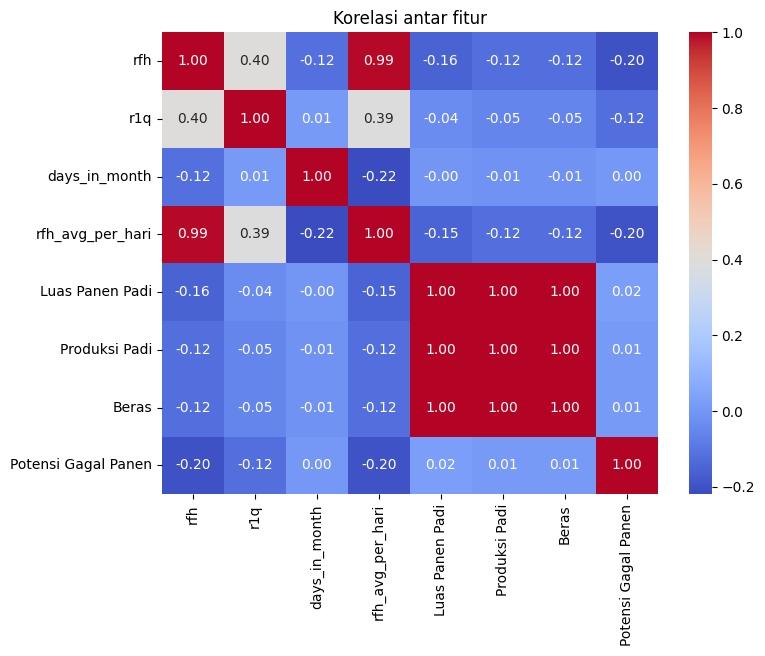

In [37]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar fitur")
plt.show()

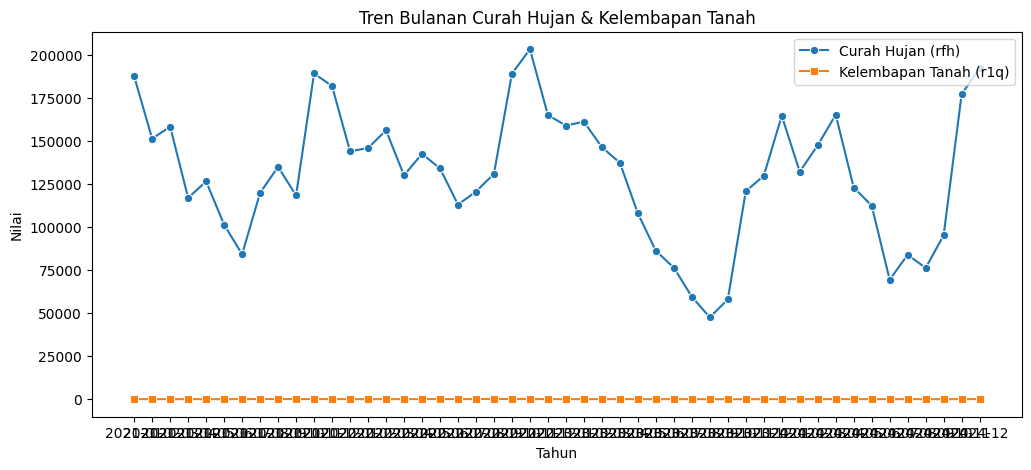

In [ ]:
# Tren curah hujan
plt.figure(figsize=(12,5))
sns.lineplot(data=data, x='year_month', y='rfh', marker='o', label='Curah Hujan (rfh)')
sns.lineplot(data=data, x='year_month', y='r1q', marker='s', label='Kelembapan Tanah (r1q)')
plt.title("Tren Bulanan Curah Hujan & Kelembapan Tanah")
plt.xlabel("Bulan")
plt.ylabel("Nilai")
plt.legend()
plt.show()


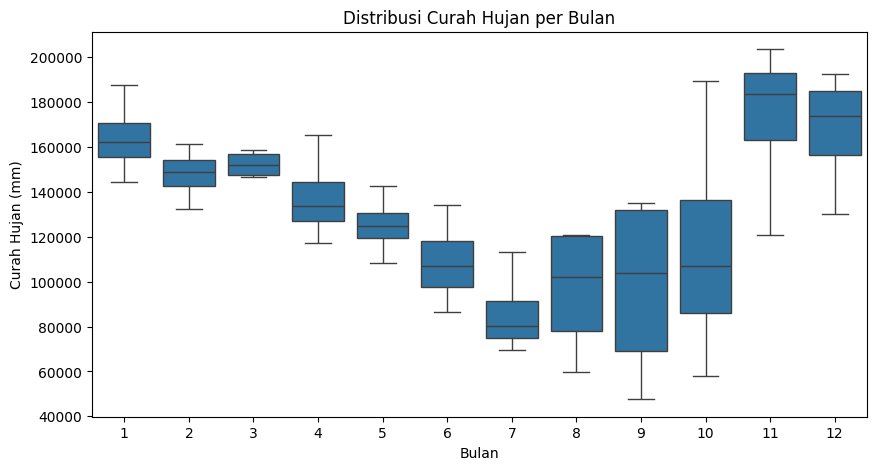

In [40]:
data['year_month'] = pd.to_datetime(data['year_month'].astype(str))

data['bulan'] = data['year_month'].dt.month
data['tahun'] = data['year_month'].dt.year

# Boxplot rfh
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='bulan', y='rfh')
plt.title("Distribusi Curah Hujan per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Curah Hujan (mm)")
plt.show()



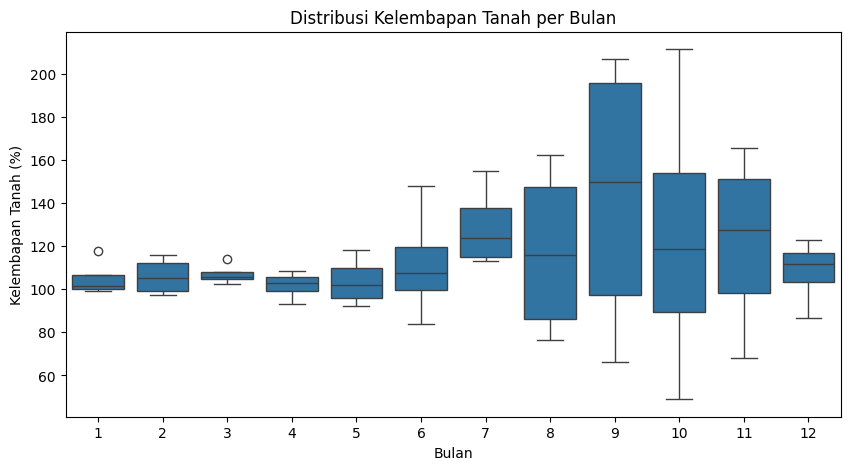

In [42]:
# Boxplot r1q
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='bulan', y='r1q')
plt.title("Distribusi Kelembapan Tanah per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Kelembapan Tanah (%)")
plt.show()

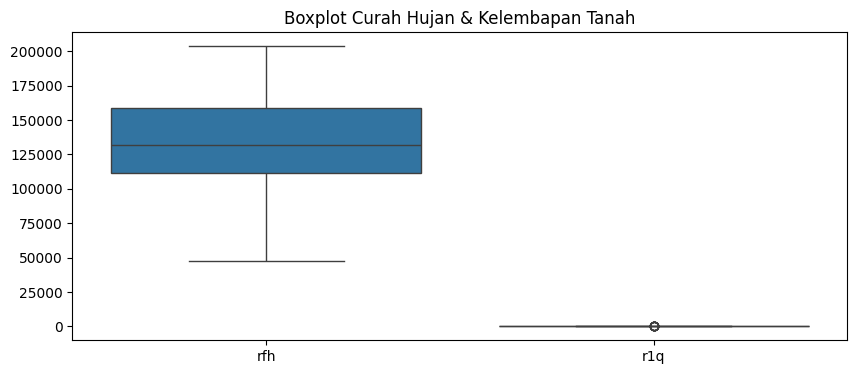

In [43]:
plt.figure(figsize=(10,4))
sns.boxplot(data=data[['rfh', 'r1q']])
plt.title("Boxplot Curah Hujan & Kelembapan Tanah")
plt.show()

In [44]:
# Moving Average 3 bulan
data['rfh_ma3'] = data['rfh'].rolling(window=3).mean()
data['r1q_ma3'] = data['r1q'].rolling(window=3).mean()

In [45]:
# Anomali curah hujan dari rata-rata tahunan
data['anomali_rfh'] = data['rfh'] - data.groupby('tahun')['rfh'].transform('mean')

In [46]:
data.head()

,year_month,rfh,r1q,days_in_month,rfh_avg_per_hari,Datetime,Luas Panen Padi,Produksi Padi,Beras,Potensi Gagal Panen,bulan,tahun,rfh_ma3,r1q_ma3,anomali_rfh
0,2021-01-01,187771.771242,117.859010,31,6057.153911,2021-01,413085.27,2083251.67,1200266.00,23597.54,1,2021,NaN,NaN,48364.942304
1,2021-02-01,151508.907771,110.662893,28,5411.032420,2021-02,772897.06,4056990.92,2336619.60,31626.06,2,2021,NaN,NaN,12102.078834
2,2021-03-01,158540.740725,102.602612,31,5114.217443,2021-03,1785269.41,9671598.42,5570088.32,23067.82,3,2021,165940.473246,110.374838,19133.911788
3,2021-04-01,117116.671788,101.498824,30,3903.889060,2021-04,1460711.07,7771058.36,4475679.84,14883.98,4,2021,142388.773428,104.921443,-22290.157149
4,2021-05-01,126709.488898,92.293287,31,4087.402868,2021-05,784039.38,3949995.17,2277012.62,25933.33,5,2021,134122.300470,98.798241,-12697.340039


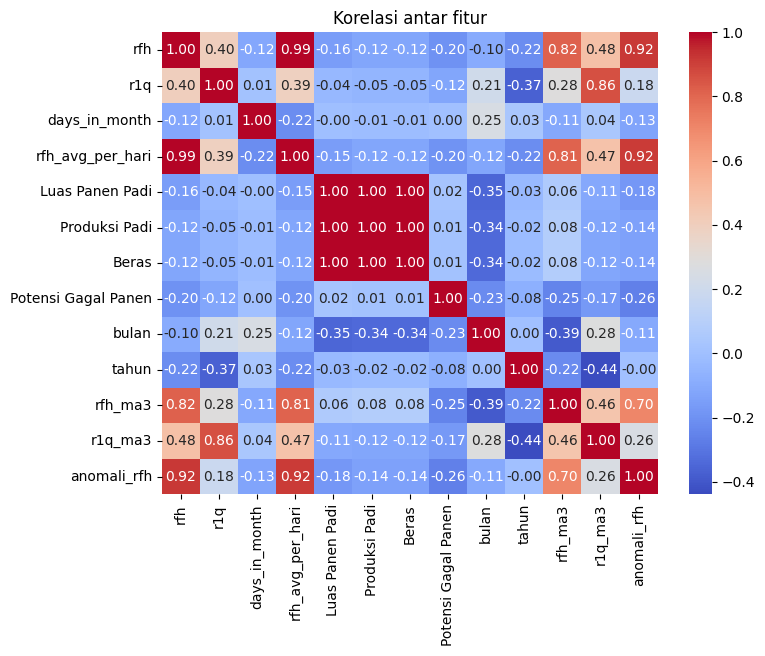

In [47]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar fitur")
plt.show()